In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from functions import plot_bar_with_values,plot_bar_without_values,plot_bar_without_values_2

In [2]:
url = "https://raw.githubusercontent.com/AlejandroAlegrePinilla/FitRing/main/merged_data.csv"
df = pd.read_csv(url)
pd.set_option("display.max_columns", None)
df.columns = df.columns.str.lower().str.strip().str.replace(" ", "_")
df.head()

,age,sex,blood_pressure,heart_rate,obesity,exercise_hours_per_week,sedentary_hours_per_day,bmi,physical_activity_days_per_week,sleep_hours_per_day,country,gdp,population
0,21,Female,174/99,72,0,2.078353,9,28.176571,4,4,France,2937,67.63
1,45,Male,130/84,66,1,13.693785,7,25.120605,4,6,France,2937,67.63
2,40,Male,160/76,96,1,17.632128,4,26.417047,4,6,France,2937,67.63
3,86,Male,99/85,46,0,3.466864,1,18.792834,6,10,France,2937,67.63
4,50,Male,149/73,43,0,0.618010,0,25.769026,7,9,France,2937,67.63


Top 5 countries with more obesity

In [3]:
group_obesity = df.groupby('country').size().reset_index(name='obesity')
top_5_obesity = group_obesity.sort_values(by='obesity', ascending=False).head(5)
top_5_obesity

,country,obesity
1,Germany,477
4,United Kingdom,457
0,France,446
2,Italy,431
3,Spain,430


Top 5 countries with more GDP

In [4]:
group_gdp = df.groupby('country')['gdp'].sum().reset_index()
top_5_gdp = group_gdp.sort_values(by='gdp', ascending=False).head(5)
top_5_gdp

,country,gdp
1,Germany,2014371
4,United Kingdom,1456459
0,France,1309902
2,Italy,905100
3,Spain,612750


Top 5 countries with less physical activity days per week

In [5]:
group_physical_activity_days_per_week = df.groupby('country')["physical_activity_days_per_week"].mean().reset_index()
top_5_physical_activity_days_per_week = group_physical_activity_days_per_week.sort_values(by='physical_activity_days_per_week', ascending=True).head(5)
top_5_physical_activity_days_per_week

,country,physical_activity_days_per_week
1,Germany,3.452830
2,Italy,3.484919
0,France,3.495516
4,United Kingdom,3.654267
3,Spain,3.655814


Top 5 countries with more sedentary hours per day

In [6]:
group_sedentary_hours_per_day = df.groupby('country')["sedentary_hours_per_day"].mean().reset_index()
top_5_sedentary_hours_per_day = group_sedentary_hours_per_day.sort_values(by='sedentary_hours_per_day', ascending=False).head(5)
top_5_sedentary_hours_per_day

,country,sedentary_hours_per_day
4,United Kingdom,5.621444
2,Italy,5.419954
3,Spain,5.409302
1,Germany,5.238994
0,France,5.152466


Top 5 countries

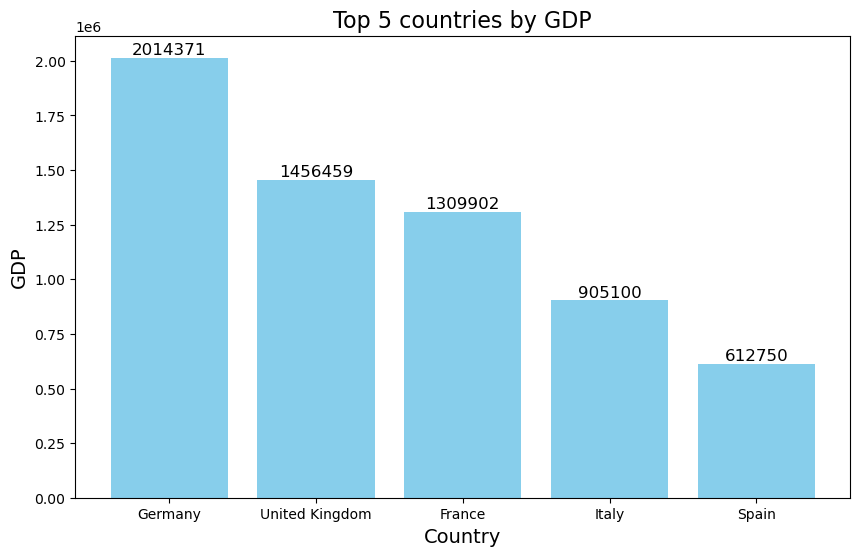

In [7]:
plot_bar_with_values(top_5_gdp, "country", "gdp", "Top 5 countries by GDP", "Country", "GDP")

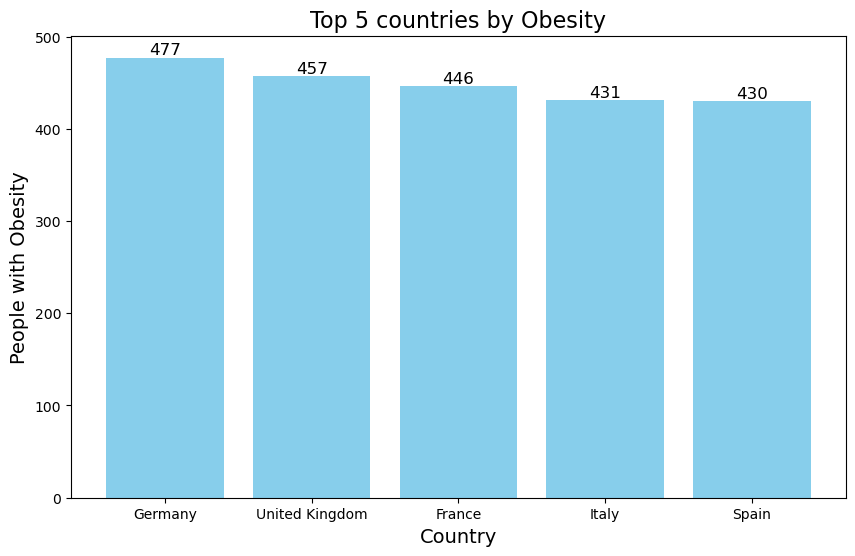

In [8]:
plot_bar_with_values(top_5_obesity, "country", "obesity", "Top 5 countries by Obesity", "Country", "People with Obesity")

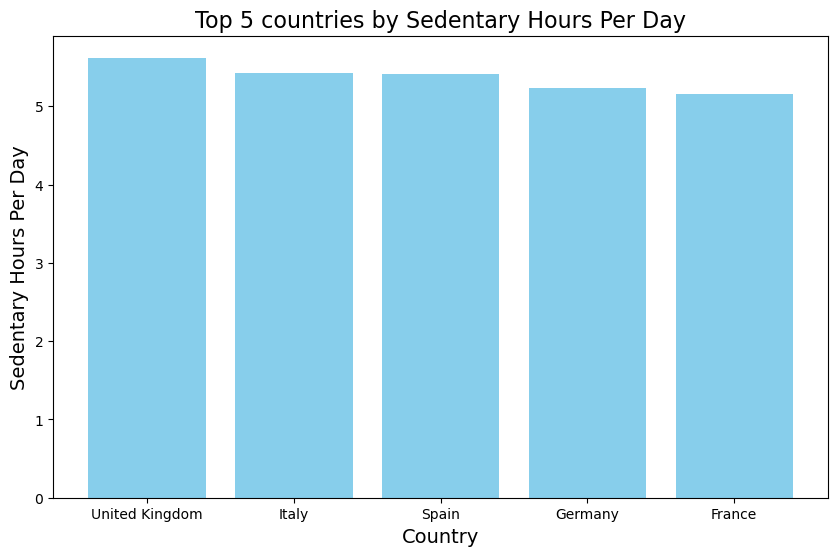

In [9]:
plot_bar_without_values(top_5_sedentary_hours_per_day, "country", "sedentary_hours_per_day", "Top 5 countries by Sedentary Hours Per Day", "Country", "Sedentary Hours Per Day")

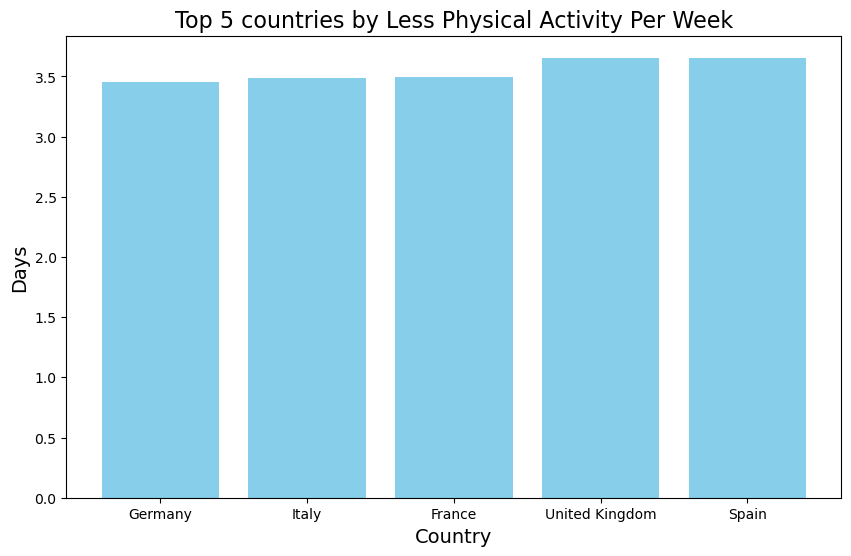

In [10]:
plot_bar_without_values(top_5_physical_activity_days_per_week, "country", "physical_activity_days_per_week", "Top 5 countries by Less Physical Activity Per Week", "Country", "Days")

Germany Age Distribution

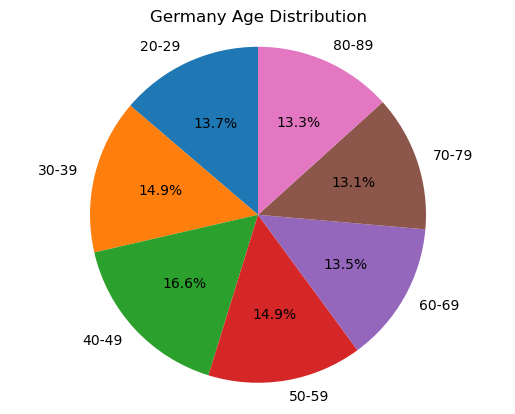

In [11]:
age_bins = [20, 29, 39, 49, 59, 69, 79, 89]
age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']

df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)
age_group_counts = df[df["country"] == "Germany"]['age_group'].value_counts().sort_index()

plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Germany Age Distribution')
plt.show()

In [13]:
merged_df = pd.merge(top_5_sedentary_hours_per_day, top_5_physical_activity_days_per_week, on='country')
merged_df_sorted = merged_df.sort_values(by='physical_activity_days_per_week')

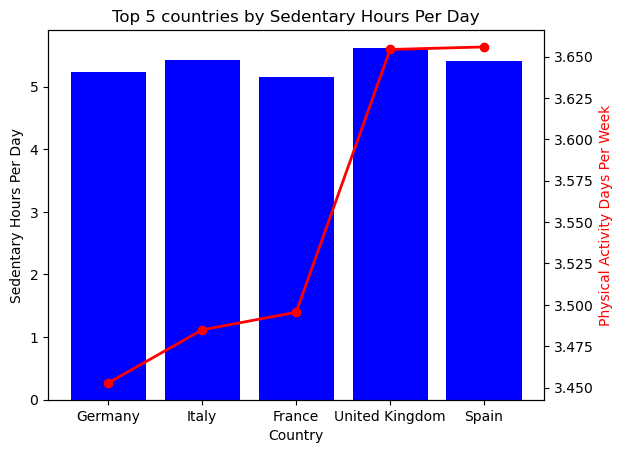

In [14]:
fig, ax1 = plt.subplots()
plot_bar_without_values_2(merged_df_sorted, "country", "sedentary_hours_per_day", "Top 5 countries by Sedentary Hours Per Day", "Country", "Sedentary Hours Per Day", ax1, color='blue')

ax2 = ax1.twinx()
ax2.plot(merged_df_sorted['country'], merged_df_sorted['physical_activity_days_per_week'], color='r', marker='o', linestyle='-', linewidth=2)
ax2.set_ylabel('Physical Activity Days Per Week', color='r')

plt.show()